# Import Necessary Libraries

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Data 

In [3]:
books_data = pd.read_csv('book.csv')
books_data

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
...        ...       ...      ...       ...     ...     ...      ...   
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1            0          0        0         0  
2            0          0        0         0  
3            0          0        0         0  
4            0          0        0         0  
...        ...        ...      ...       ...  
1995         1          0        1         1  
1996         0          0        0         0  
1997         0          0        0         0  
1998         0          0        0         0  
1999         0          0        0         0  

[2000 rows x 11 columns]

# Data Understanding

In [4]:
books_data.shape

(2000, 11)

In [5]:
books_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
books_data.describe()

ChildBks     YouthBks     CookBks     DoItYBks       RefBks  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean      0.423000     0.247500     0.43100     0.282000     0.214500   
std       0.494159     0.431668     0.49534     0.450086     0.410578   
min       0.000000     0.000000     0.00000     0.000000     0.000000   
25%       0.000000     0.000000     0.00000     0.000000     0.000000   
50%       0.000000     0.000000     0.00000     0.000000     0.000000   
75%       1.000000     0.000000     1.00000     1.000000     0.000000   
max       1.000000     1.000000     1.00000     1.000000     1.000000   

            ArtBks      GeogBks     ItalCook    ItalAtlas      ItalArt  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.241000     0.276000     0.113500     0.037000     0.048500   
std       0.427797     0.447129     0.317282     0.188809     0.214874   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Florence  
count  2000.000000  
mean      0.108500  
std       0.311089  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [7]:
books_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

Since data is in good format so no data preprosessing needed

## 1. Association rules with default parameter vales. ie 50% support and 80% confidence

### 50% support

In [8]:
frequent_items = apriori(books_data,min_support=0.5,use_colnames=True)
frequent_items

Empty DataFrame
Columns: [support, itemsets]
Index: []

##### Since for default parameter values no observation matches the support value so tweaking of parameters  is needed 

## 2. Association rules with 40% and 30% support and 80% confidence

### 40% support

In [9]:
frequent_items = apriori(books_data,min_support=0.4,use_colnames=True)
frequent_items

support    itemsets
0    0.423  (ChildBks)
1    0.431   (CookBks)

### 80% confidence

In [10]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=0.8)
best_associates

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

### 30% support

In [11]:
frequent_items = apriori(books_data,min_support=0.4,use_colnames=True)
frequent_items

support    itemsets
0    0.423  (ChildBks)
1    0.431   (CookBks)

### 80% confidence

In [12]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=0.8)
best_associates

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

#### At 40% and 30% support at any level of confidence tr are no associates

## 3. Association rules with 20% support and 80% confidence

### 20% support

In [13]:
frequent_items = apriori(books_data,min_support=0.2,use_colnames=True)
frequent_items

support             itemsets
0   0.4230           (ChildBks)
1   0.2475           (YouthBks)
2   0.4310            (CookBks)
3   0.2820           (DoItYBks)
4   0.2145             (RefBks)
5   0.2410             (ArtBks)
6   0.2760            (GeogBks)
7   0.2560  (ChildBks, CookBks)

### 80% confidence

In [14]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=0.8)
best_associates

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

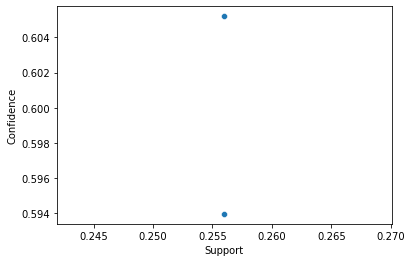

In [15]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

## 4. Association rules with 10% support and 80%,100%,200% confidence

### 10% support

In [16]:
frequent_items = apriori(books_data,min_support=0.1,use_colnames=True)
frequent_items

support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (RefBks, ChildBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (GeogBks, CookBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (DoItYBks, RefBks)
25   0.1235             (DoItYBks, ArtBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (GeogBks, RefBks)
28   0.1275              (GeogBks, ArtBks)
29   0.1290  (YouthBks, ChildBks, CookBks)
30   0.1460  (DoItYBks, ChildBks, CookBks)
31   0.1225    (RefBks, ChildBks, CookBks)
32   0.1265    (ArtBks, ChildBks, CookBks)
33   0.1495   (GeogBks, ChildBks, CookBks)
34   0.1045  (DoItYBks, ChildBks, GeogBks)
35   0.1020    (GeogBks, ArtBks, ChildBks)
36   0.1015    (DoItYBks, ArtBks, CookBks)
37   0.1085   (DoItYBks, CookBks, GeogBks)
38   0.1035     (GeogBks, ArtBks, CookBks)

### 80% confidence

In [17]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=0.8)
best_associates

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95  (GeogBks, CookBks)            (ArtBks)              0.1925   
96   (ArtBks, CookBks)           (GeogBks)              0.1670   
97           (GeogBks)   (ArtBks, CookBks)              0.2760   
98            (ArtBks)  (GeogBks, CookBks)              0.2410   
99           (CookBks)   (GeogBks, ArtBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
..                 ...      ...         ...       ...       ...         ...  
95              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
96              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
97              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
98              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
99              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  

[100 rows x 9 columns]

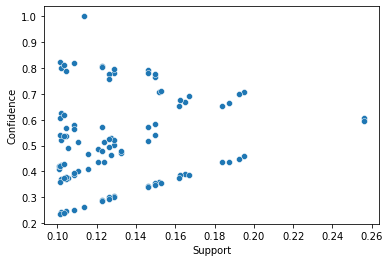

In [18]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 100% confidence

In [19]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=1)
best_associates

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95  (GeogBks, CookBks)            (ArtBks)              0.1925   
96   (ArtBks, CookBks)           (GeogBks)              0.1670   
97           (GeogBks)   (ArtBks, CookBks)              0.2760   
98            (ArtBks)  (GeogBks, CookBks)              0.2410   
99           (CookBks)   (GeogBks, ArtBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
..                 ...      ...         ...       ...       ...         ...  
95              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
96              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
97              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
98              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
99              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  

[100 rows x 9 columns]

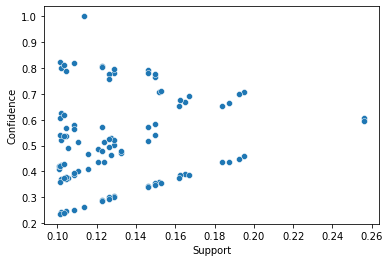

In [20]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 200% confidence

In [21]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=2)
best_associates

antecedents           consequents  antecedent support  \
0              (CookBks)            (ItalCook)              0.4310   
1             (ItalCook)             (CookBks)              0.1135   
2    (ChildBks, CookBks)            (YouthBks)              0.2560   
3             (YouthBks)   (ChildBks, CookBks)              0.2475   
4    (ChildBks, CookBks)            (DoItYBks)              0.2560   
5             (DoItYBks)   (ChildBks, CookBks)              0.2820   
6    (ChildBks, CookBks)              (RefBks)              0.2560   
7               (RefBks)   (ChildBks, CookBks)              0.2145   
8    (ChildBks, CookBks)              (ArtBks)              0.2560   
9               (ArtBks)   (ChildBks, CookBks)              0.2410   
10   (ChildBks, CookBks)             (GeogBks)              0.2560   
11             (GeogBks)   (ChildBks, CookBks)              0.2760   
12  (DoItYBks, ChildBks)             (GeogBks)              0.1840   
13             (GeogBks)  (DoItYBks, ChildBks)              0.2760   
14   (GeogBks, ChildBks)              (ArtBks)              0.1950   
15    (ArtBks, ChildBks)             (GeogBks)              0.1625   
16             (GeogBks)    (ArtBks, ChildBks)              0.2760   
17              (ArtBks)   (GeogBks, ChildBks)              0.2410   
18   (DoItYBks, CookBks)              (ArtBks)              0.1875   
19     (ArtBks, CookBks)            (DoItYBks)              0.1670   
20            (DoItYBks)     (ArtBks, CookBks)              0.2820   
21              (ArtBks)   (DoItYBks, CookBks)              0.2410   
22   (DoItYBks, CookBks)             (GeogBks)              0.1875   
23             (GeogBks)   (DoItYBks, CookBks)              0.2760   
24    (GeogBks, CookBks)              (ArtBks)              0.1925   
25     (ArtBks, CookBks)             (GeogBks)              0.1670   
26             (GeogBks)     (ArtBks, CookBks)              0.2760   
27              (ArtBks)    (GeogBks, CookBks)              0.2410   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  
1               0.4310   0.1135    1.000000  2.320186  0.064582         inf  
2               0.2475   0.1290    0.503906  2.035985  0.065640    1.516850  
3               0.2560   0.1290    0.521212  2.035985  0.065640    1.553924  
4               0.2820   0.1460    0.570312  2.022385  0.073808    1.670982  
5               0.2560   0.1460    0.517730  2.022385  0.073808    1.542706  
6               0.2145   0.1225    0.478516  2.230842  0.067588    1.506277  
7               0.2560   0.1225    0.571096  2.230842  0.067588    1.734652  
8               0.2410   0.1265    0.494141  2.050376  0.064804    1.500417  
9               0.2560   0.1265    0.524896  2.050376  0.064804    1.565974  
10              0.2760   0.1495    0.583984  2.115885  0.078844    1.740319  
11              0.2560   0.1495    0.541667  2.115885  0.078844    1.623273  
12              0.2760   0.1045    0.567935  2.057735  0.053716    1.675673  
13              0.1840   0.1045    0.378623  2.057735  0.053716    1.313213  
14              0.2410   0.1020    0.523077  2.170444  0.055005    1.591452  
15              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628  
16              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
17              0.1950   0.1020    0.423237  2.170444  0.055005    1.395719  
18              0.2410   0.1015    0.541333  2.246196  0.056313    1.654797  
19              0.2820   0.1015    0.607784  2.155264  0.054406    1.830626  
20              0.1670   0.1015    0.359929  2.155264  0.054406    1.301418  
21              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674  
22              0.2760   0.1085    0.578667  2.096618  0.056750    1.718354  
23              0.1875   0.1085    0.393116  2.096618  0.056750    1.338806  
24              0.2410   0.1035 

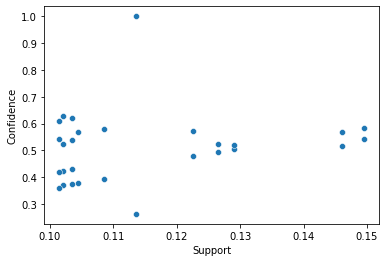

In [22]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

## 5. Association rules with 10% support and 80% confidence with different max_length

### 5.1. 10% support max_length = 1

In [23]:
frequent_items = apriori(books_data,min_support=0.1,use_colnames=True,max_len=1)
frequent_items

support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)
5   0.2410    (ArtBks)
6   0.2760   (GeogBks)
7   0.1135  (ItalCook)
8   0.1085  (Florence)

### 80% confidence

In [24]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=0.8)
best_associates

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

For max_length = 1 there are no associates

### 5.2. 10% support max_length=2

In [25]:
frequent_items = apriori(books_data,min_support=0.1,use_colnames=True,max_len=2)
frequent_items

support              itemsets
0    0.4230            (ChildBks)
1    0.2475            (YouthBks)
2    0.4310             (CookBks)
3    0.2820            (DoItYBks)
4    0.2145              (RefBks)
5    0.2410              (ArtBks)
6    0.2760             (GeogBks)
7    0.1135            (ItalCook)
8    0.1085            (Florence)
9    0.1650  (YouthBks, ChildBks)
10   0.2560   (ChildBks, CookBks)
11   0.1840  (DoItYBks, ChildBks)
12   0.1515    (RefBks, ChildBks)
13   0.1625    (ArtBks, ChildBks)
14   0.1950   (GeogBks, ChildBks)
15   0.1620   (YouthBks, CookBks)
16   0.1155  (DoItYBks, YouthBks)
17   0.1010    (YouthBks, ArtBks)
18   0.1205   (GeogBks, YouthBks)
19   0.1875   (DoItYBks, CookBks)
20   0.1525     (RefBks, CookBks)
21   0.1670     (ArtBks, CookBks)
22   0.1925    (GeogBks, CookBks)
23   0.1135   (CookBks, ItalCook)
24   0.1055    (DoItYBks, RefBks)
25   0.1235    (DoItYBks, ArtBks)
26   0.1325   (DoItYBks, GeogBks)
27   0.1105     (GeogBks, RefBks)
28   0.1275     (GeogBks, ArtBks)

### 80% confidence

In [26]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=0.8)
best_associates

antecedents consequents  antecedent support  consequent support  support  \
0   (YouthBks)  (ChildBks)              0.2475              0.4230   0.1650   
1   (ChildBks)  (YouthBks)              0.4230              0.2475   0.1650   
2   (ChildBks)   (CookBks)              0.4230              0.4310   0.2560   
3    (CookBks)  (ChildBks)              0.4310              0.4230   0.2560   
4   (DoItYBks)  (ChildBks)              0.2820              0.4230   0.1840   
5   (ChildBks)  (DoItYBks)              0.4230              0.2820   0.1840   
6     (RefBks)  (ChildBks)              0.2145              0.4230   0.1515   
7   (ChildBks)    (RefBks)              0.4230              0.2145   0.1515   
8     (ArtBks)  (ChildBks)              0.2410              0.4230   0.1625   
9   (ChildBks)    (ArtBks)              0.4230              0.2410   0.1625   
10   (GeogBks)  (ChildBks)              0.2760              0.4230   0.1950   
11  (ChildBks)   (GeogBks)              0.4230              0.2760   0.1950   
12  (YouthBks)   (CookBks)              0.2475              0.4310   0.1620   
13   (CookBks)  (YouthBks)              0.4310              0.2475   0.1620   
14  (DoItYBks)  (YouthBks)              0.2820              0.2475   0.1155   
15  (YouthBks)  (DoItYBks)              0.2475              0.2820   0.1155   
16  (YouthBks)    (ArtBks)              0.2475              0.2410   0.1010   
17    (ArtBks)  (YouthBks)              0.2410              0.2475   0.1010   
18   (GeogBks)  (YouthBks)              0.2760              0.2475   0.1205   
19  (YouthBks)   (GeogBks)              0.2475              0.2760   0.1205   
20  (DoItYBks)   (CookBks)              0.2820              0.4310   0.1875   
21   (CookBks)  (DoItYBks)              0.4310              0.2820   0.1875   
22    (RefBks)   (CookBks)              0.2145              0.4310   0.1525   
23   (CookBks)    (RefBks)              0.4310              0.2145   0.1525   
24    (ArtBks)   (CookBks)              0.2410              0.4310   0.1670   
25   (CookBks)    (ArtBks)              0.4310              0.2410   0.1670   
26   (GeogBks)   (CookBks)              0.2760              0.4310   0.1925   
27   (CookBks)   (GeogBks)              0.4310              0.2760   0.1925   
28   (CookBks)  (ItalCook)              0.4310              0.1135   0.1135   
29  (ItalCook)   (CookBks)              0.1135              0.4310   0.1135   
30  (DoItYBks)    (RefBks)              0.2820              0.2145   0.1055   
31    (RefBks)  (DoItYBks)              0.2145              0.2820   0.1055   
32  (DoItYBks)    (ArtBks)              0.2820              0.2410   0.1235   
33    (ArtBks)  (DoItYBks)              0.2410              0.2820   0.1235   
34  (DoItYBks)   (GeogBks)              0.2820              0.2760   0.1325   
35   (GeogBks)  (DoItYBks)              0.2760              0.2820   0.1325   
36   (GeogBks)    (RefBks)              0.2760              0.2145   0.1105   
37    (RefBks)   (GeogBks)              0.2145              0.2760   0.1105   
38   (GeogBks)    (ArtBks)              0.2760              0.2410   0.1275   
39    (ArtBks)   (GeogBks)              0.2410              0.2760   0.1275   

    confidence      lift  leverage  conviction  
0     0.666667  1.576044  0.060308    1.731000  
1     0.390071  1.576044  0.060308    1.233750  
2     0.605201  1.404179  0.073687    1.441240  
3     0.593968  1.404179  0.073687    1.421069  
4     0.652482  1.542511  0.064714    1.660347  
5     0.434988  1.542511  0.064714    1.270770  
6     0.706294  1.669725  0.060767    1.964548  
7     0.358156  1.669725  0.060767    1.223818  
8     0.674274  1.594028  0.060557    1.771427  
9     0.384161  1.594028  0.060557    1.232464  
10    0.706522  1.670264  0.078252    1.966074  
11    0.460993  1.670264  0.078252    1.343211  
12    0.654545  1.518667  0.055328    1.647105  
13    0.375870  1.518667  0.055328    1.205678  
14    0.409574  1.654846  0.

For max_length = 1 there are no associates

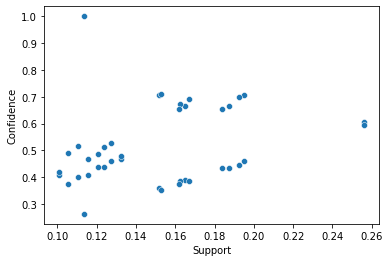

In [27]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 5.3. 10% support max_length=3

In [28]:
frequent_items = apriori(books_data,min_support=0.1,use_colnames=True,max_len=3)
frequent_items

support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (RefBks, ChildBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (GeogBks, CookBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (DoItYBks, RefBks)
25   0.1235             (DoItYBks, ArtBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (GeogBks, RefBks)
28   0.1275              (GeogBks, ArtBks)
29   0.1290  (YouthBks, ChildBks, CookBks)
30   0.1460  (DoItYBks, ChildBks, CookBks)
31   0.1225    (RefBks, ChildBks, CookBks)
32   0.1265    (ArtBks, ChildBks, CookBks)
33   0.1495   (GeogBks, ChildBks, CookBks)
34   0.1045  (DoItYBks, ChildBks, GeogBks)
35   0.1020    (GeogBks, ArtBks, ChildBks)
36   0.1015    (DoItYBks, ArtBks, CookBks)
37   0.1085   (DoItYBks, CookBks, GeogBks)
38   0.1035     (GeogBks, ArtBks, CookBks)

### 80% confidence

In [29]:
best_associates = association_rules(frequent_items,metric='lift',min_threshold=0.8)
best_associates

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95  (GeogBks, CookBks)            (ArtBks)              0.1925   
96   (ArtBks, CookBks)           (GeogBks)              0.1670   
97           (GeogBks)   (ArtBks, CookBks)              0.2760   
98            (ArtBks)  (GeogBks, CookBks)              0.2410   
99           (CookBks)   (GeogBks, ArtBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
..                 ...      ...         ...       ...       ...         ...  
95              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
96              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
97              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
98              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
99              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  

[100 rows x 9 columns]

For max_length = 1 there are no associates

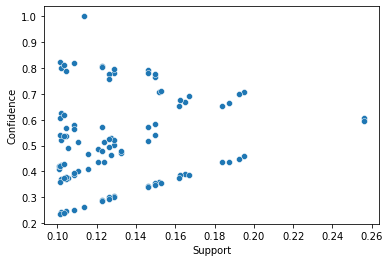

In [30]:
# visualization for best associates
sns.scatterplot(best_associates['support'],best_associates['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# ============================THE END=========================